# Comparing speed and performance of deep learning vs non-deep learning models

## Introduction

TODO: Write computer specs

### 💡Definitions:

**Neural networks** are a type of machine learning algorithm that is inspired by the human brain. <br> 
Neural networks are composed of multiple layers of artificial neurons. Each layer is connected to the next layer.<br>
The first layer is the input layer, the last layer is the output layer, and the layers in between are the hidden layers.<br>
The hidden layers are responsible for learning the features of the data. The output layer is responsible for the prediction.<br>

**Non-deep learning** models can also be based on other machine learning algorithms such as decision trees, random forests, and support vector machines. In this notebook we will not be using these models since computer vision problems are more suited for neural networks.

**Deep learning** models are a type of neural network that has multiple hidden layers. Deep learning models are used to solve more complex problems since they are able to learn more hidden patterns in the data.<br>

> "How many layers does a network have to have in order to qualify as deep? There is no definite answer to this (it's a bit like asking how many grains make a heap), but usually having two or more hidden layers counts as deep. In contrast, a network with only a single hidden layer is conventionally called "shallow"." ([Source](https://stats.stackexchange.com/questions/182734/what-is-the-difference-between-a-neural-network-and-a-deep-neural-network-and-w))

![neural networks](types_of_nn.png)

#### Deep Learning vs. Traditional Computer Vision

> A lot of the CV techniques invented in the past 20 years have become irrelevant in recent years because of DL. However, knowledge is never obsolete and there is always something worth learning from each generation of innovation. That knowledge can give you more intuitions and tools to use especially when you wish to deal with 3D CV problems for example. Knowing only DL for CV will dramatically limit the kind of solutions in a CV engineer’s arsenal.

Source: https://arxiv.org/ftp/arxiv/papers/1910/1910.13796.pdf

## Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import time
import os
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage.io import imread
from skimage.transform import resize
import seaborn as sns
import PIL.Image as Image


## 📉 A simple boundary

Summary:
- For simple problems, non-deep learning models are faster and more accurate
- Neural networks are innacurate when the data is not complex enough and we don't account for error margins.
- Deep learning is a waste of time and resources when the data is not complex
- Best model: Logistic regression (0.007 seconds training, 0.002 seconds prediction, 100% accuracy)

We will start off with a simple classification problem where the data is linearly separable.

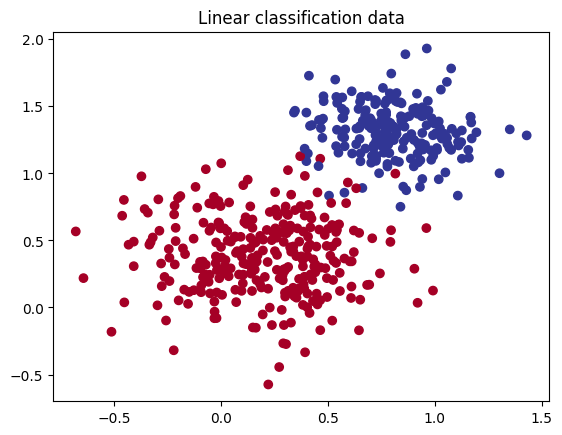

In [2]:
# Load data
linear_data = pd.read_csv('linear_classification.csv', header=None)

# Plot the data
plt.scatter(linear_data[0], linear_data[1], c=linear_data[2], cmap='RdYlBu')
plt.title('Linear classification data')
plt.show()

In [3]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(linear_data[[0, 1]], linear_data[2], test_size=0.2, random_state=0)

### Logistic regression

In [4]:
log_1 = sklearn.linear_model.LogisticRegression()
start_time = time.time()
log_1.fit(x_train, y_train)
end_time = time.time()
print("Training time: ", round(end_time - start_time, 4), "seconds")

Training time:  0.009 seconds


In [5]:
# Test the model
y_pred = log_1.predict(x_test)
print("Accuracy: ", log_1.score(x_test, y_test))

# Time to make one prediction
start_time = time.time()
log_1.predict(x_test[0:1])
end_time = time.time()
print("Prediction time: ", round(end_time - start_time, 5), "seconds")

Accuracy:  1.0
Prediction time:  0.002 seconds


The linear regression model was extremely fast to train (0.002 seconds) and it achieved 100% accuracy.

### Neural network

In [6]:
# A simple neural network with one hidden layer
neural_1 = models.Sequential([
    # input layer
    layers.Dense(64, activation='relu', input_shape=(2,)),
    # one hidden layer
    layers.Dense(64, activation='relu'),
    # output layer with one neuron
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
neural_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
neural_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Train the model
start_time = time.time()
neural_1_hist = neural_1.fit(x_train, y_train, epochs=10, batch_size=10, verbose=0)
end_time = time.time()
print("Training time: ", round(end_time - start_time, 4), "seconds")

Training time:  1.8709 seconds


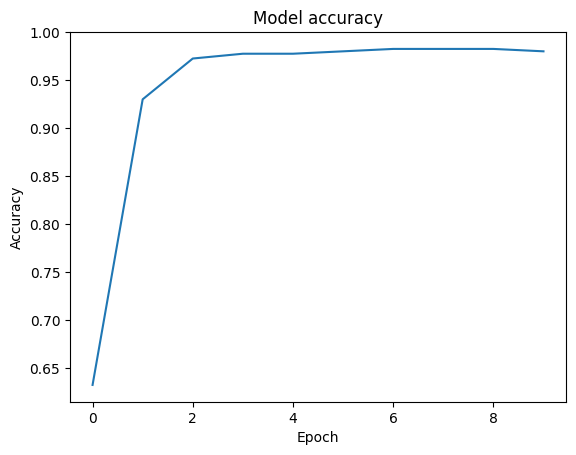

In [8]:
# Learning curves
plt.plot(neural_1_hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [9]:
# Test the model
start_time = time.time()
y_pred = neural_1.predict(x_test)
end_time = time.time()
print("Testing time: ", round(end_time - start_time, 4), "seconds")
print("Accuracy: ", neural_1.evaluate(x_test, y_test)[1])

4/4 [==============================] - 0s 2ms/step
Testing time:  0.1942 seconds
4/4 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 1.0000
Accuracy:  1.0


The neural network model was also fast to train, although longer than the logistic regression model (1.45 seconds). It also achieved 100% accuracy.


### Deep neural network

In [10]:
# A neural network with multiple hidden layers
deepneural_1 = models.Sequential([
    # input layer
    layers.Dense(64, activation='relu', input_shape=(2,)),
    # multiple hidden layers
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    # output layer with one neuron
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
deepneural_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
deepneural_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                192       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 64)               

Epoch 1/10
40/40 [==============================] - 2s 3ms/step - loss: 0.5369 - accuracy: 0.8350
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 0.1535 - accuracy: 0.9375
Epoch 3/10
40/40 [==============================] - 0s 5ms/step - loss: 0.0549 - accuracy: 0.9750
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0709 - accuracy: 0.9775
Epoch 5/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0592 - accuracy: 0.9775
Epoch 6/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9775
Epoch 7/10
40/40 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9800
Epoch 8/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 0.9825
Epoch 9/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9850
Epoch 10/10
40/40 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 0.9775
Training time:  3.3

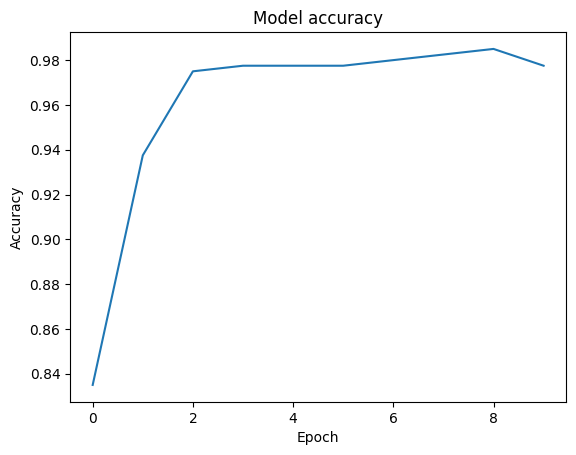

In [11]:
# Train the model
start_time = time.time()
deepneural_1_hist = deepneural_1.fit(x_train, y_train, epochs=10, batch_size=10)
end_time = time.time()
print("Training time: ", round(end_time - start_time, 4), "seconds")

# Learning curves
plt.plot(deepneural_1_hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [12]:
# Test the model
start_time = time.time()
y_pred = deepneural_1.predict(x_test)
end_time = time.time()
print("Testing time: ", round(end_time - start_time, 4), "seconds")
print("Accuracy: ", deepneural_1.evaluate(x_test, y_test)[1])

4/4 [==============================] - 0s 2ms/step
Testing time:  0.1818 seconds
4/4 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 1.0000
Accuracy:  1.0


As we can see, the deep neural network was slower to train (1.1337 seconds) and it does not add any value. Actually, because of the complex random stucture, it sometimes does not even achieve 100% accuracy, but had 98-99% accuracy.

## 🧫 A non-linear classification problem

Summary:

- For non-linear simple problems, non-deep learning models like SVM are fast and accurate
- Neural networks work well for non-linear problems, but they are slower than SVM. They also require more data to achieve the same accuracy.

> (About classification in general) "SVMs and NNs can both perform this task; with an appropriate choice of kernel, in the case of the SVM, or of activation function, in the case of NNs. The difference, therefore, isn’t in the types of tasks that they perform; but rather, in other characteristics of their theoretical bases and their implementation (...)." ([Source](https://www.baeldung.com/cs/svm-vs-neural-network))

We will now try to solve a non-linear classification problem. In this case, a linear regression model will not be able to solve the problem, since the data is not linearly separable.

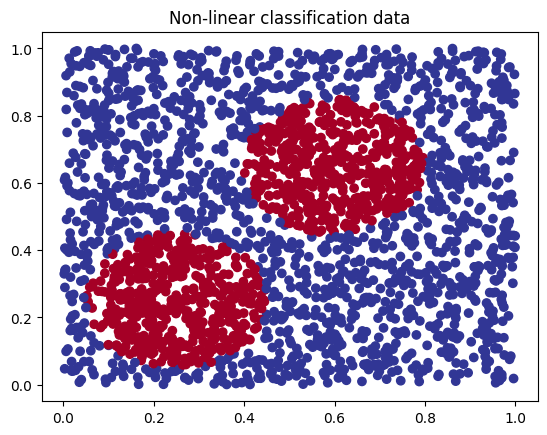

In [48]:
# Load data from the txt file
data = pd.read_csv('non_linear_classification.csv', header=None)

# Plot the data
plt.scatter(data[0], data[1], c=data[2], cmap='RdYlBu')
plt.title('Non-linear classification data')
plt.show()

In [49]:
x = data[[0, 1]]
y = data[2]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Support vector machine

In [50]:
svm_1 = svm.SVC(kernel='rbf')

# Train the model
start_time = time.time()
svm_1.fit(x_train, y_train)
end_time = time.time()
print("Training time: ", round(end_time - start_time, 4), "seconds")

Training time:  0.056 seconds


Accuracy:  0.9821
Prediction time:  0.00297 seconds


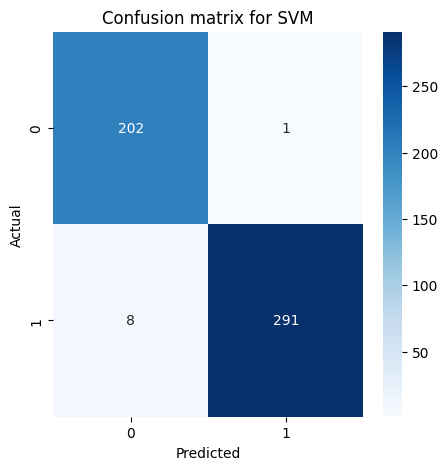

In [51]:
# Evaluate the model
y_pred = svm_1.predict(x_test)
print("Accuracy: ", round(accuracy_score(y_test, y_pred), 4))

# Time to make one prediction
start_time = time.time()
svm_1.predict(x_test[0:1])
end_time = time.time()
print("Prediction time: ", round(end_time - start_time, 5), "seconds")

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix for SVM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


The support vector machine model with the RBF (Radial basis function) kernel was very fast to train (0.056 seconds) and it achieved 98.21% accuracy.

### Neural network

In [17]:
# TODO: Create a neural network with one hidden layer for non-linear classification

### Deep neural network

In [18]:
# TODO: Create a deep neural network with multiple hidden layers for non-linear classification

## 🖼️ Image classification

We now move on to much more complex problems. We will try to classify the images in our dataset which have 3 classes: no people, few people, and many people.

A Random Forest model has been written for the "non_neuralnetwork_classification" task. We will reuse it here and evaluate its performance.

In [81]:
df = pd.read_csv('../swarmIoT_full_labeled_dataset.csv')
folder_path = '../ordered_data'

x = []
y = []

dirs = []
dirs.append(os.listdir(f'{folder_path}/0'))
dirs.append(os.listdir(f'{folder_path}/1'))
dirs.append(os.listdir(f'{folder_path}/2'))

for d in dirs:
    np.random.shuffle(d)

for c in range(3):
    for i in range(300):
        path = f'{folder_path}/{c}/{dirs[c][i]}'
        img = Image.open(path)
        img = img.resize((150, 150))
        img = np.array(img)
        x.append(img)
        y.append(c)

x = np.array(x)
y = np.array(y)

# Reshape the data to 2D for the classifier
x = x.reshape(x.shape[0], -1)

# Normalize the pixel values to be between 0 and 1
x = x / 255

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Random forest classifier

In [6]:
rtc_1 = sklearn.ensemble.RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)

# Train the model
start_time = time.time()
rtc_1.fit(x_train, y_train)
end_time = time.time()
print("Training time: ", round(end_time - start_time, 4), "seconds")

Training time:  14.9343 seconds


Accuracy:  0.55
Prediction time:  0.01701 seconds


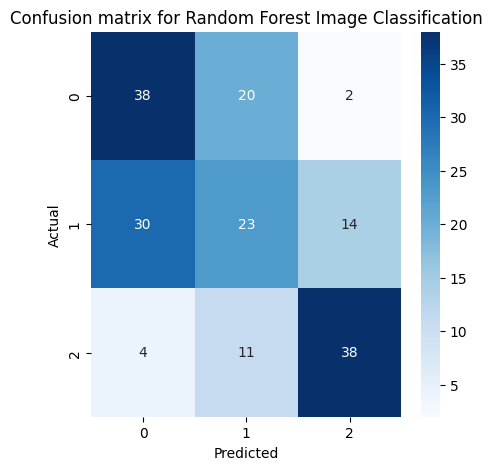

In [7]:
# Test the model
y_pred = rtc_1.predict(x_test)
print("Accuracy: ", round(accuracy_score(y_test, y_pred), 4))

# Time to make one prediction
start_time = time.time()
rtc_1.predict(x_test[0:1])
end_time = time.time()
print("Prediction time: ", round(end_time - start_time, 5), "seconds")

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix for Random Forest Image Classification')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We can see that the Random Forest model was relatively fast to train (14.93 seconds) but it was not very accurate (only 55% accuracy).

### Support vector machine

I tried using a GridSearchCV to find the best parameters for the model, so I wouldn't have to manually try different parameters and have to rerun it multiple times. But I stopped the GridSearchCV after almost 2 hours and it still hadn't finished.

So I could not even evaluate the performance of the model, but we clearly see that it was not a good idea to use a SVM for this problem.

In [35]:
svc_estimator = svm.SVC(kernel='rbf')
param_grid = {'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svm_2 = GridSearchCV(svc_estimator, param_grid)

In [7]:
# Train the model
start_time = time.time()
svm_2.fit(x_train, y_train)
end_time = time.time()
print("Training time: ", round(end_time - start_time, 4), "seconds")

# Stopped at 103m 18s without finishing

Let's try to at least run it with a smaller dataset and see if it finishes in a reasonable amount of time.

In [82]:
x_small = []
y_small = []

for c in range(3):
    for i in range(40):
        path = f'{folder_path}/{c}/{dirs[c][i]}'
        img = imread(path)
        img = resize(img, (150, 150, 3))
        x_small.append(img.flatten())
        y_small.append(c)

x_small = np.array(x_small)
y_small = np.array(y_small)

# Put the data into a dataframe
df_small = pd.DataFrame(x_small)
df_small['choice'] = y_small

df_small.head()

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,choice
0,0.125643,0.138364,0.131464,0.156671,0.166007,0.159146,0.157417,0.161676,0.156344,0.161482,...,0.494728,0.553753,0.683167,0.487120,0.549223,0.678635,0.470144,0.532889,0.662300,0
1,0.452634,0.473010,0.445133,0.465481,0.489892,0.437495,0.374404,0.401624,0.333210,0.381917,...,0.545399,0.487851,0.503082,0.644103,0.574867,0.580473,0.646214,0.554131,0.532196,0
2,0.597488,0.561733,0.304052,0.543407,0.501036,0.349734,0.385628,0.348565,0.287190,0.568885,...,0.384253,0.280897,0.247133,0.493999,0.378640,0.317052,0.597615,0.498683,0.423446,0
3,0.793271,0.809158,0.676179,0.843222,0.878603,0.666945,0.824182,0.872429,0.659784,0.870133,...,0.993786,0.992204,0.991030,0.904524,0.909793,0.894127,0.683596,0.694580,0.700067,0
4,0.342119,0.363823,0.331180,0.394150,0.420058,0.382808,0.362257,0.393960,0.316501,0.330701,...,0.708374,0.675447,0.615855,0.698239,0.660947,0.604525,0.695362,0.663489,0.667751,0


In [83]:
x_train, x_test, y_train, y_test = train_test_split(df_small.iloc[:,:-1], df_small.iloc[:,-1], test_size=0.2, random_state=42)

In [62]:
# Train the model
start_time = time.time()
svm_2.fit(x_train, y_train)
end_time = time.time()
print("Training time: ", round(end_time - start_time, 4), "seconds")

Training time:  420.1408 seconds


In [63]:
# Best parameters
print(svm_2.best_params_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}


In [64]:
# Use the best parameters to measure individual training time
svc_best_params = svm.SVC(kernel='poly', C=1, gamma=0.0001)
start_time = time.time()
svc_best_params.fit(x_train, y_train)
end_time = time.time()
print("Individual training time: ", round(end_time - start_time, 4), "seconds")

Individual training time:  2.4878 seconds


Accuracy:  0.6667
Prediction time:  0.65213 seconds


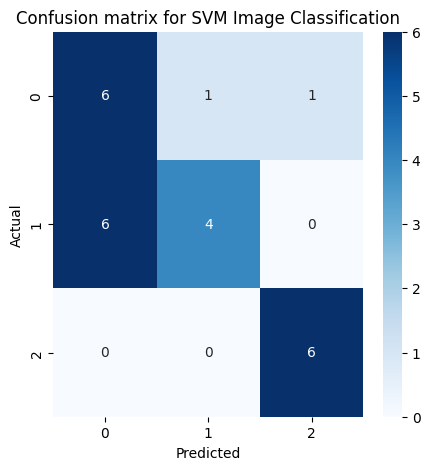

In [65]:
# Test the model
y_pred = svc_best_params.predict(x_test)
print("Accuracy: ", round(accuracy_score(y_test, y_pred), 4))

# Time to make one prediction
start_time = time.time()
svc_best_params.predict(x_test[0:1])
end_time = time.time()
print("Prediction time: ", round(end_time - start_time, 5), "seconds")

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix for SVM Image Classification')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

With a smaller dataset of 120 images, the SVM model was able to train in 2.4878 seconds (GridSearchCV took 420.1408 seconds), but it was still not very accurate (only 66.67% accuracy).

### Neural network

Now we will try to use a neural network to solve this problem.<br>
We will first try to use the smaller dataset of 120 images to see how long it takes to train and how accurate it is.

In [120]:
neural_3 = keras.Sequential([
    # Input layer
    keras.layers.Dense(64, activation='relu', input_shape=(67500,)),
    # Hidden layers
    keras.layers.Dense(32, activation='relu'),
    # Output layer
    keras.layers.Dense(3, activation='softmax')
])

neural_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [100]:
# Train the model
start_time = time.time()
neural_3_hist = neural_3.fit(x_train, y_train, epochs=10, batch_size=10, validation_data=(x_test, y_test), verbose=0)
end_time = time.time()
print("Training time: ", round(end_time - start_time, 4), "seconds")

Training time:  4.9048 seconds


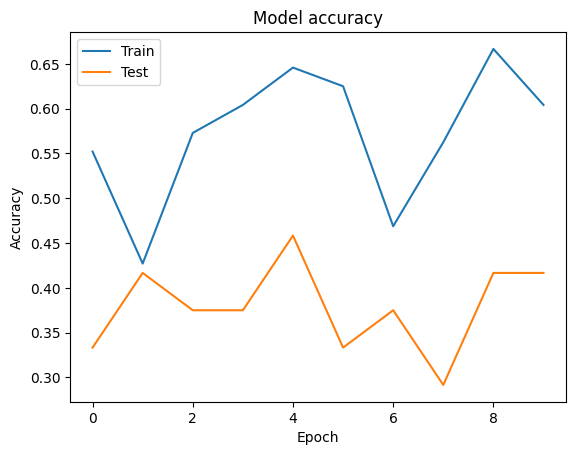

In [101]:
# Plot learning curve
plt.plot(neural_3_hist.history['accuracy'])
plt.plot(neural_3_hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 34ms/step
Accuracy:  0.4167
1/1 [==============================] - 0s 28ms/step
Prediction time:  0.09499 seconds


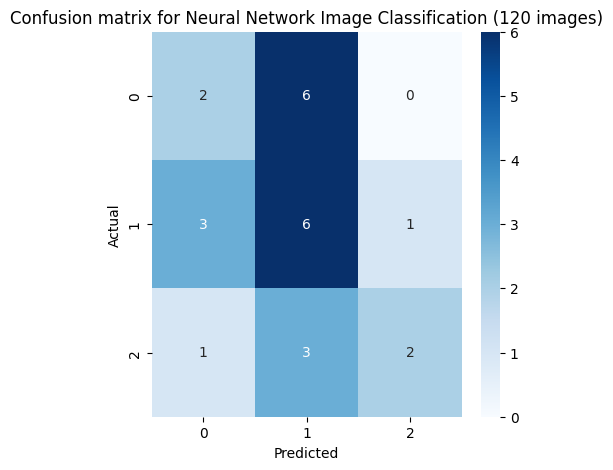

In [102]:
# Test the model
y_pred = neural_3.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print("Accuracy: ", round(accuracy_score(y_test, y_pred), 4))

# Time to make one prediction
start_time = time.time()
neural_3.predict(x_test[0:1])
end_time = time.time()
print("Prediction time: ", round(end_time - start_time, 5), "seconds")

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix for Neural Network Image Classification (120 images)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The results are pretty random. Sometimes I get 33% accuracy because the model decides to predict the same class for all the images. Retraining with the same parameters multiple times yielded results between 31% and 46% accuracy. <br>
Training takes less than 5 seconds, but the accuracy is terrible. The model is not able to perform well on a small dataset.

Let's try to use a bigger dataset of 3000 images.

In [142]:
x_big = []
y_big = []

for c in range(3):
    for i in range(1000):
        path = f'{folder_path}/{c}/{dirs[c][i]}'
        img = imread(path)
        img = resize(img, (150, 150, 3))
        x_big.append(img.flatten())
        y_big.append(c)

x_big = np.array(x_big)
y_big = np.array(y_big)

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x_big, y_big, test_size=0.2, random_state=42)

In [144]:
# Train the model
start_time = time.time()
neural_3_hist = neural_3.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
end_time = time.time()
print("Training time: ", round(end_time - start_time, 4), "seconds")

Epoch 1/10
75/75 [==============================] - 6s 65ms/step - loss: 1.1029 - accuracy: 0.4504 - val_loss: 0.9568 - val_accuracy: 0.5250
Epoch 2/10
75/75 [==============================] - 5s 63ms/step - loss: 0.9766 - accuracy: 0.4933 - val_loss: 0.9458 - val_accuracy: 0.5100
Epoch 3/10
75/75 [==============================] - 4s 58ms/step - loss: 0.9717 - accuracy: 0.4867 - val_loss: 0.9237 - val_accuracy: 0.5217
Epoch 4/10
75/75 [==============================] - 4s 57ms/step - loss: 0.9541 - accuracy: 0.5088 - val_loss: 1.3725 - val_accuracy: 0.3367
Epoch 5/10
75/75 [==============================] - 4s 57ms/step - loss: 0.9952 - accuracy: 0.4900 - val_loss: 0.9288 - val_accuracy: 0.5650
Epoch 6/10
75/75 [==============================] - 4s 56ms/step - loss: 0.9524 - accuracy: 0.5129 - val_loss: 0.9093 - val_accuracy: 0.5283
Epoch 7/10
75/75 [==============================] - 4s 58ms/step - loss: 0.9409 - accuracy: 0.5254 - val_loss: 0.9345 - val_accuracy: 0.5200
Epoch 8/10
75

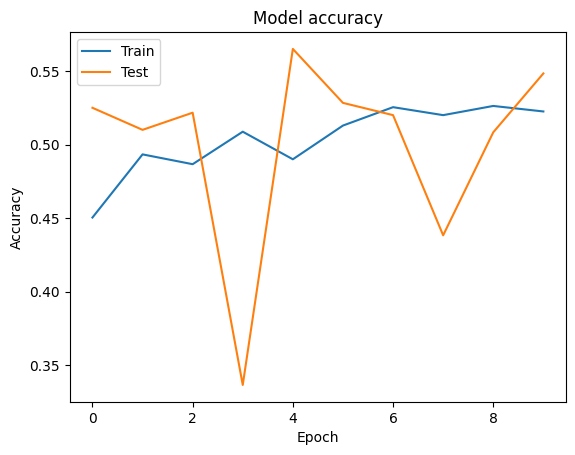

In [145]:
# Plot learning curve
plt.plot(neural_3_hist.history['accuracy'])
plt.plot(neural_3_hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

19/19 [==============================] - 0s 9ms/step
Accuracy:  0.5483
1/1 [==============================] - 0s 33ms/step
Prediction time:  0.0964 seconds


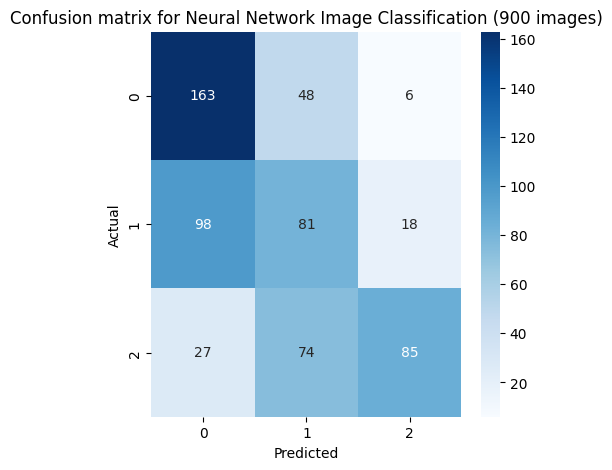

In [146]:
# Test the model
y_pred = neural_3.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print("Accuracy: ", round(accuracy_score(y_test, y_pred), 4))

# Time to make one prediction
start_time = time.time()
neural_3.predict(x_test[0:1])
end_time = time.time()
print("Prediction time: ", round(end_time - start_time, 5), "seconds")

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix for Neural Network Image Classification (900 images)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Giving this model more data to learn from, it was able to achieve slightly better accuracy, although it is still not very good (only 54.83% accuracy).<br>
Training it is also still reasonable at 45 seconds.

### Deep neural network

In [9]:
batch_size = 32
img_height = 200
img_width = 200
path = 'data/selected_images'

train_ds = keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 3000 files belonging to 3 classes.
Using 2400 files for training.
Found 3000 files belonging to 3 classes.
Using 600 files for validation.


In [18]:
deepneural_3 = keras.Sequential([
    # Input layer
    keras.layers.InputLayer(input_shape=(img_width, img_height, 3)),
    # Hidden layers
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    # Output layer
    keras.layers.Dense(3, activation='softmax')
])

deepneural_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Train the model
start_time = time.time()
deepneural_3_hist = deepneural_3.fit(train_ds, epochs=5, validation_data=val_ds, batch_size=batch_size)
end_time = time.time()
print("Training time: ", round(end_time - start_time, 4), "seconds")

Epoch 1/5
75/75 [==============================] - 54s 701ms/step - loss: 1.1082 - accuracy: 0.4125 - val_loss: 1.0762 - val_accuracy: 0.4817
Epoch 2/5
53/75 [====================>.........] - ETA: 15s - loss: 1.0440 - accuracy: 0.4711

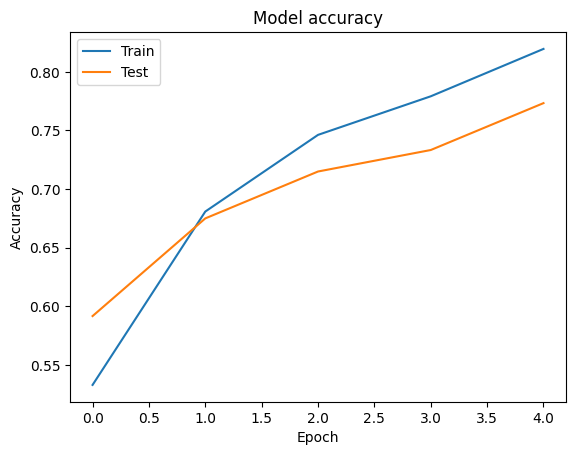

In [8]:
# Plot learning curve
plt.plot(deepneural_3_hist.history['accuracy'])
plt.plot(deepneural_3_hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [7]:
# Test the model
loss, accuracy = deepneural_3.evaluate(val_ds)
print("Accuracy: ", round(accuracy, 4))

# Time to make one prediction
start_time = time.time()
deepneural_3.predict(val_ds)
end_time = time.time()
print("Prediction time: ", round(end_time - start_time, 5), "seconds")

# Plot learning curve


19/19 [==============================] - 4s 197ms/step
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Cristina\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Cristina\AppData\Local\Temp\ipykernel_7796\2675887926.py", line 4, in <module>
    print("Accuracy: ", round(accuracy_score(y_test, y_pred), 4))
NameError: name 'y_test' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Cristina\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2052, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Cristina\AppData\Roaming\Python\Python310\site-packages\IPython\core\ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\Cristina\AppData\Roaming\Python\Python310\site-packages\IPython\core\ultratb.py", line 101